{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Describe how lidar data are used to measure changes in the landscape after a flood.

</div>


## Measuring Impacts of the 2013 Colorado Floods

The Colorado floods had significant environmental, social and economic impacts. Now that you have a better understanding of the flood’s drivers and how to measure them---including atmosphere and drought as well as precipitation and stream discharge---you will learn how to use remote sensing to measure the impacts of flood events on the landscape.

<iframe width="560" height="315" src="https://www.youtube.com/embed/bUcWERTM-OA?rel=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

Aerial imagery video of Lee Hill, near Boulder, CO, before and after the 2013 flood event. Source: NEON Science.


Last week you used Google Earth before and after imagery to view differences in the landscape in Boulder prior to and following the flood. In that exercise, you were able to see areas where roads and buildings were lost, where mudslides occurred, and more. 

In the following weeks, you will use Light Detection and Ranging (lidar) data to understand changes in terrain that occur during a flood. LiDAR data can be used to measure changes in elevation over time.
 
<figure>
 <a href="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/jamestown-home-destroyed-colorado-floods.jpg">
 <img src="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/jamestown-home-destroyed-colorado-floods.jpg" alt = "An emotional couple looks on at a home destroyed by the floods near Jamestown, Colorado."></a>
 <figcaption>An emotional couple looks on at a home destroyed by the floods near Jamestown, Colorado. Source:<a href="https://www.denverpost.com/2015/09/12/two-years-later-2013-colorado-floods-remain-a-nightmare-for-some/" target="_blank">The Denver Post.</a>
 </figcaption>
</figure>


### How Floods Impact the Landscape

### What Is Lidar Data?

Watch the video below to learn more about how lidar data works. 

<iframe width="560" height="315" src="https://www.youtube.com/embed/EYbhNSUnIdU?rel=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>


### How Do You Use Lidar to Measure Flood Impacts on Landscapes?

Sedimentation and erosion are common landscape impacts from flooding. These processes occur when heavy rain leads to increased streamflow, which leads to stream surges, which creates energy that erodes sediment from one place and moves it to another. Lidar sensors on satellites and airplanes scan the landscape and create models of the elevation of the earth’s surface. 

Lidar data collected before and after a flood event can be used to quantify sedimentation and erosion due to the flood. Lidar can also be used to quantify the loss or movement of trees, buildings, and other objects that are on the earth’s surface.

Lidar data are often converted into raster format because it is easier to work with. A Digital Elevation Model (DEM) is a common lidar derived raster product. DEMs can be Digital Terrain Models (DTM), which measure only the elevation of the ground (terrain), or Digital Surface Models (DSM) which measure the elevation of everything on the surface of the earth, including trees, buildings, or other structures. 

Below you will use lidar data to create DEMs to analyze landscape change due to the Colorado floods.

## Where Can You Find Lidar Data?

Several public organizations offer free lidar data including:

* <a href="https://earthexplorer.usgs.gov/" target="_blank">USGS Earth Explorer</a>
* <a href="http://www.opentopography.org/" target = "_blank">OpenTopography</a>
* <a href="https://www.usgs.gov/core-science-systems/ngp/tnm-delivery/" target = "_blank">The National Map</a>
* <a href="http://www.neonscience.org/" target = "_blank">National Ecological Observatory Network (NEON)

The data that you will use this week in the course was collected by NEON.

## Using Elevation Models to Track Flood Impacts  

### Use Digital Terrain Models to Track Changes in Terrain  

Below, you can see a Digital Terrain Model (DTM) created for the lower Four-Mile Canyon Creek area in Boulder, Colorado using data collected before and after the 2013 floods. These maps show subtle differences in elevation, particularly along the stream bed. However, it is challenging to really compare these maps with the naked eye.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from matplotlib.colors import ListedColormap
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(font_scale=1.5, style="white")

# set home directory and download data
data = et.data.get_data("colorado-flood", verbose = False)
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

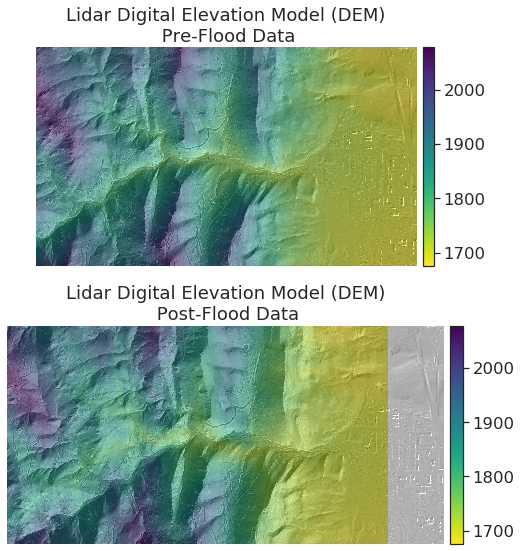

In [8]:
# subtract the two rasters to create a difference raster
# open crop extent
crop_extent = gpd.read_file(
    'data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp')

# first clip
#plot_crop_ext = [plot_crop_ext[i] for i in bounds]

# create crop box from fire boundary
lidar_clip = es.extent_to_json(crop_extent)

# DTMS before and after overlayed on hillshade go here.
# open raster DTM data
with rio.open("data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif") as src:
    lidar_dem_im, _ = es.crop_image(src, [lidar_clip])
    #lidar_dem_im = src.read(masked = True)[0]
    #lidar_dem_im[lidar_dem_im < 0] = np.nan
    lidar_pre_bounds = src.bounds

# open dem hillshade
with rio.open("data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif") as src:
    lidar_dem_hill, _ = es.crop_image(src, [lidar_clip])
    #lidar_dem_hill = src.read(masked = True)[0]


with rio.open("data/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif") as src:
    lidar_dem_im_post, _ = es.crop_image(src, [lidar_clip])
    #lidar_dem_im_post = src.read(masked = True)[0]
    lidar_dem_im_post[lidar_dem_im_post < 0] = np.nan
    #lidar_post_bounds = src.bounds

# open dem hillshade
with rio.open("data/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM_hill.tif") as src:
    lidar_dem_hill_post, _ = es.crop_image(src, [lidar_clip])
    lidar_dem_hill_post = src.read(masked=True)[0]

#pre_ext = [lidar_pre_bounds[i] for i in bounds]
#post_ext = [lidar_post_bounds[i] for i in bounds]
# calculate extent

fig, (ax, ax1) = plt.subplots(2, 1, figsize=(12, 8))
ep.plot_bands(
    lidar_dem_im[0],
    ax=ax,
    scale=False,
    cmap='viridis_r',
    title="Lidar Digital Elevation Model (DEM)\n Pre-Flood Data (meters)"
)
ax.imshow(lidar_dem_hill[0], cmap='Greys', alpha=0.5)
ax.set_axis_off()
ep.plot_bands(
    lidar_dem_im_post[0],
    ax=ax1,
    scale=False,
    cmap='viridis_r',
    title="Lidar Digital Elevation Model (DEM)\n Post-Flood Data (meters)"
)
ax1.imshow(lidar_dem_hill_post, cmap='Greys', alpha=0.5)
ax1.set_axis_off()
plt.tight_layout()
plt.show()

## Digital Elevation Model of Difference (DoD)

While the above DEMs look almost identical visually, they can be used to create another model that is more useful for the purpose of studying flood impacts, a Digital Elevation Model of Difference (DoD). A DoD is created by subtracting one DTM from the other and shows the change that occurred in a given location over a certain period of time.

The DoD created with the Four Mile Canyon Creek DTMs is below. Areas in purple have a lower elevation after the flood; in other words, they have experienced erosion. Areas in green have a higher elevation after the flood and have experienced sedimentation.


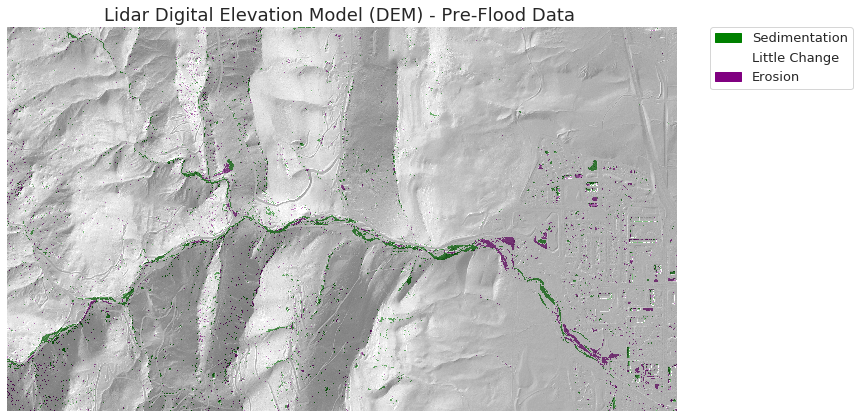

In [3]:
# this still needs a legend
dem_diff = lidar_dem_im_post - lidar_dem_im
# Define bins that you want, and then classify the data
class_bins = [-15, -.5, .5, 11]
dem_class = np.digitize(dem_diff, class_bins)
class_list = np.ndarray.tolist(np.unique(dem_class))[1:]
dem_cols = ["green", "white", "purple"]
ch_colors_cmap = ListedColormap(dem_cols)

#dem_class = np.ma.masked_where(dem_class == 2, dem_class)

fig, ax = plt.subplots(figsize=(12, 8))
ep.plot_bands(
    lidar_dem_hill[0],
    cmap='Greys',
    ax=ax,
    title="Lidar Digital Elevation Model (DEM) - Pre-Flood Data ",
    cbar=False
)
fin_plot = ax.imshow(dem_class[0], alpha=.5,
                     cmap=ch_colors_cmap)
ax.set_axis_off()
xlabels = ["Sedimentation", "Little Change", "Erosion"]
ep.draw_legend(fin_plot, titles=xlabels, classes=class_list)
plt.show()

Below is a cross-section showing the data represented by a DoD. The orange areas are where the earth's surface is lower than before and the teal areas are where the earth's surface is higher than before.
 
<figure>
 <a href="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/dtm-dod-cross-section-colorado-floods.jpg">
 <img src="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/dtm-dod-cross-section-colorado-floods.jpg" alt = "A cross section of what is represented in a Digital Elevation Model of Difference (DoD)."></a>
 <figcaption>A cross section of what is represented in a Digital Elevation Model of Difference (DoD). Source: NEON.
 </figcaption>
</figure>


## Using Data to Study Floods and other Extreme Events

Now you should have a better understanding of how data on drought, atmospheric conditions, precipitation, streamflow, and elevation can help you understand floods. Quantifying drivers and impacts with these tools allows scientists, city planners, developers, and homeowners to make educated choices to prepare for and respond to disturbance events. In the next lessons you will learn how to use Python to work with lidar data to understand landscape change.